### Exploratory Data Analysis using Python
Analysing global under5 Death rates

You can find the raw data & official analysis here: https://platform.who.int/data/maternal-newborn-child-adolescent-ageing/indicator-explorer-new/mca/number-of-under-five-deaths---by-cause

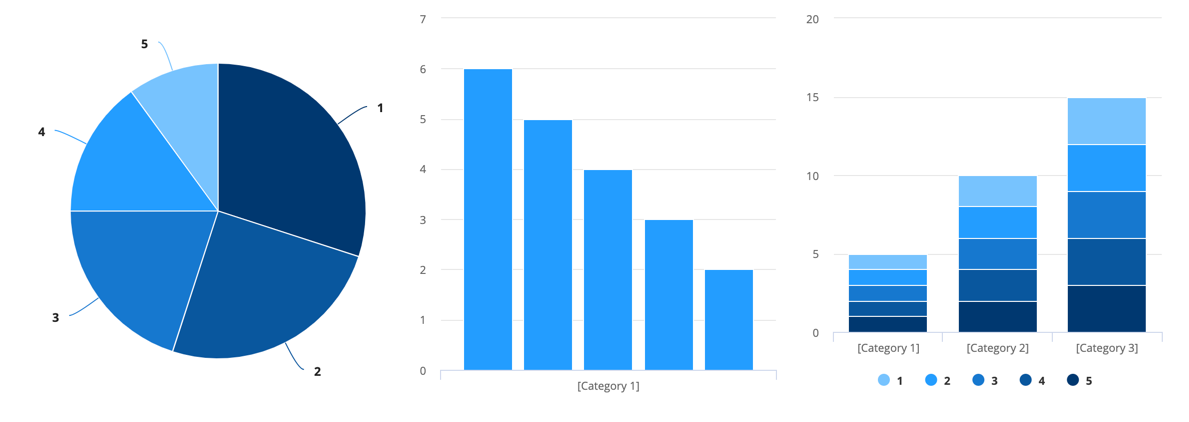

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Dataset = pd.read_excel(r"C:\Users\user\Projects for portfolio\WHO Data 2023-12-03 20-12.xlsx", sheet_name = 'Data')
Dataset.tail(2)

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
61906,Number of neonatal deaths - by cause,2021,Zimbabwe,NaN,Africa,Lower middle income,0-28 Days,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),15.592869,15.592869
61907,Number of neonatal deaths - by cause,2021,Zimbabwe,NaN,Africa,Lower middle income,0-28 Days,Meningitis/encephalitis,MCEE,Maternal and Child Epidemiology Estimation (MCEE),37.955568,37.955568


### clean the data

1. Take a copy of the dataset and work on that. Any changes made on the     copy will not affect the main dataset
2. Remove unwanted columns
3. Use describe to roughly check the average deaths in total
4. change the column names to avoid syntax errors
5. Handle null values
6. Handle Duplicate values
7. Feature Selection for analysis

### Exploratory Analysis and Visualisation
Columns we will analyse
   1. Year
   2. Income Group
   3. cause
   4. Region
   
#### I. Year        
   * Is there a correlation between the year and mortality rates
   * how has the no. of under 5 death rates changed over the year
   * mortality in Top 5 countries Over the Years.
   * Which cause was the reason for highest death rates every year


#### II. Income Group     
   * Total death rates per income group overall
   * Cause-Based Analysis Across Income Groups
   * Region-Based Analysis Across Income Groups


#### III. Cause
   * Maximum mortality rates by each cause
   * Total death rate due to each cause throughout the years
   
     
#### IV. Region
   * Correlating entry counts to death rates across regions.
   * What trends do we observe in the death rates among different regions over the years?
   * In each year, which region registers the highest death rates among children under five?
   * Find out the which Region has which income groups


Let's work on the copy dataset without disturbing the original dataset

In [3]:
copy_df = Dataset.copy()

In [4]:
copy_df.columns

Index(['Indicator', 'Year', 'Country', 'Global', 'WHO region',
       'World bank income group', 'Age group', 'Cause', 'Datasource short',
       'Datasource long', 'Value Numeric', 'Value String'],
      dtype='object')

In [5]:
copy_df.drop(['Indicator','Datasource short'], inplace = True, axis=1)
copy_df.head(2)

,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource long,Value Numeric,Value String
0,2000,NaN,NaN,Africa,NaN,0-28 Days,HIV/AIDS,Maternal and Child Epidemiology Estimation (MCEE),3077.715375,3077.715375
1,2000,NaN,NaN,Africa,NaN,0-28 Days,Meningitis/encephalitis,Maternal and Child Epidemiology Estimation (MCEE),14325.620133,14325.620133


In [6]:
copy_df.describe()
# This process also shows that the value numeric and value string have the same value

,Year,Value Numeric,Value String
count,61908.00000,6.190800e+04,6.190800e+04
mean,2010.50000,3.353944e+03,3.353944e+03
std,6.34434,3.303320e+04,3.303320e+04
min,2000.00000,0.000000e+00,0.000000e+00
25%,2005.00000,0.000000e+00,0.000000e+00
50%,2010.50000,5.108912e+00,5.108912e+00
75%,2016.00000,1.862366e+02,1.862366e+02
max,2021.00000,1.417411e+06,1.417411e+06


 ### check if the columns Value_Numeric and Value_String have same values

In [7]:
copy_df['Value Numeric'].equals(copy_df['Value String'])

True

In [8]:
copy_df.drop('Value String',axis=1,inplace = True)

In [9]:
copy_df.head(1)

,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource long,Value Numeric
0,2000,NaN,NaN,Africa,NaN,0-28 Days,HIV/AIDS,Maternal and Child Epidemiology Estimation (MCEE),3077.715375


### change the column names to avoid syntax errors

In [10]:
cols = {'WHO region':'Region',
       'World bank income group':'Income_group',
       'Age group':'Age',
       'Datasource long':'Datasource_long',
       'Value Numeric':'Value_Numeric'}

In [11]:
copy_df.rename(columns=cols,inplace=True)

In [12]:
copy_df.head(1)

,Year,Country,Global,Region,Income_group,Age,Cause,Datasource_long,Value_Numeric
0,2000,NaN,NaN,Africa,NaN,0-28 Days,HIV/AIDS,Maternal and Child Epidemiology Estimation (MCEE),3077.715375


In [13]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61908 entries, 0 to 61907
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             61908 non-null  int64  
 1   Country          59752 non-null  object 
 2   Global           308 non-null    object 
 3   Region           61908 non-null  object 
 4   Income_group     58828 non-null  object 
 5   Age              61908 non-null  object 
 6   Cause            61908 non-null  object 
 7   Datasource_long  61908 non-null  object 
 8   Value_Numeric    61908 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 4.3+ MB


### check for null values

In [14]:
copy_df.isnull().sum().sort_values(ascending= False)

Global             61600
Income_group        3080
Country             2156
Year                   0
Region                 0
Age                    0
Cause                  0
Datasource_long        0
Value_Numeric          0
dtype: int64

In [16]:
copy_df.shape

(61908, 9)

In [17]:
copy_df.duplicated().value_counts()

False    61908
dtype: int64

In [18]:
copy_df.drop('Global',axis=1,inplace=True)  

# Exploratory Analysis and Visualisation
#### Columns we will analyse
   1. Year
   2. Income Group
   3. Cause
   4. Region

## I. Year
extracts the columns for our analysis

In [19]:
data  = copy_df[['Year', 'Country','Region', 'Income_group','Cause','Value_Numeric']]
data.head(3)

,Year,Country,Region,Income_group,Cause,Value_Numeric
0,2000,NaN,Africa,NaN,HIV/AIDS,3077.715375
1,2000,NaN,Africa,NaN,Meningitis/encephalitis,14325.620133
2,2000,NaN,Africa,NaN,Birth asphyxia and birth trauma,276042.602210


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Correlation between year and death rates

In [21]:
 data['Year'].corr(data['Value_Numeric'])

-0.016521825689235926

In [22]:
total_death_rates = data['Value_Numeric'].sum()
total_death_rates

207635985.00009358

### 2. how has the no. of under 5 death rates changed over the year

In [23]:
yearly_death_rates = data.groupby('Year').agg({'Value_Numeric':'sum'}).sort_values(by= 'Value_Numeric', ascending = False)
yearly_death_rates.head(5)

,Value_Numeric
Year,
2000,1.227524e+07
2001,1.195145e+07
2002,1.160366e+07
2003,1.125405e+07
2004,1.094662e+07


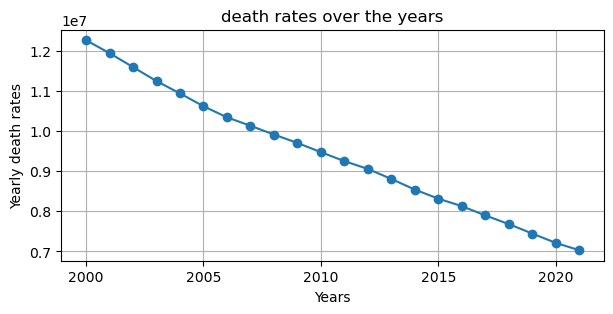

In [24]:
plt.figure(figsize=(7,3))
plt.plot(yearly_death_rates.index, yearly_death_rates.values, marker='o', linestyle='-')
plt.title('death rates over the years')
plt.xlabel('Years')
plt.ylabel('Yearly death rates')
plt.grid(True)
plt.show()


death rates has decreased from 2000 to 2021,

### 3. mortality in Top 5 countries

In [25]:
# Grouping by 'Year' and 'Country', then summing 'Value Numeric' for each year and country
country_total_death_rates = data.groupby(['Year', 'Country'])['Value_Numeric'].sum().reset_index()

# Selecting the top five countries with the highest total death rates
top_countries = country_total_death_rates.groupby('Country')['Value_Numeric'].sum().nlargest(5).index.tolist()

# Filtering data for the top five countries
top_countries_data = country_total_death_rates[country_total_death_rates['Country'].isin(top_countries)]

# Pivot the data for better visualization (each country as a separate line)
pivot_countries_data = top_countries_data.pivot(index='Year', columns='Country', values='Value_Numeric')

In [26]:
country_total_death_rates.head(5)

,Year,Country,Value_Numeric
0,2000,Afghanistan,60608.000001
1,2000,Albania,668.000000
2,2000,Algeria,13440.000000
3,2000,Andorra,3.000000
4,2000,Angola,39315.000000


In [27]:
top_countries

['India', 'Pakistan', 'Nigeria', 'China', 'Ethiopia']

In [28]:
top_countries_data.head(5)

,Year,Country,Value_Numeric
35,2000,China,3.704600e+05
59,2000,Ethiopia,1.445440e+05
78,2000,India,1.277072e+06
125,2000,Nigeria,2.477700e+05
130,2000,Pakistan,3.133310e+05


In [60]:
pivot_countries_data.head(5)

Country,China,Ethiopia,India,Nigeria,Pakistan
Year,,,,,
2000,370459.999996,144543.999999,1.277072e+06,247770.000000,313331.000003
2001,328655.999999,144249.999999,1.246501e+06,248903.999999,314469.999998
2002,300720.000001,143435.999998,1.197214e+06,249088.000000,314172.000004
2003,273913.000000,141138.000001,1.145288e+06,248423.999999,309451.000000
2004,252921.000001,139932.999999,1.096549e+06,247071.999999,306243.999997


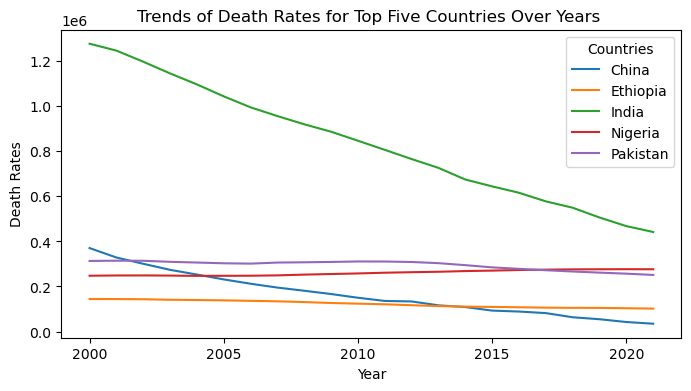

In [64]:
plt.figure(figsize=(8, 4))
for country in pivot_countries_data.columns:
    plt.plot(pivot_countries_data.index, pivot_countries_data[country], label=country)

plt.xlabel('Year')
plt.ylabel('Death Rates')
plt.title('Trends of Death Rates for Top Five Countries Over Years ')
plt.legend(title = 'Countries', loc='upper right')
plt.show()

China and india Started with high death rates in 2000 but decreased Continuously over the years, indicating a decline in mortality rates.

Ethiopia: Appears relatively stable over the years, without noticeable increases or decreases in mortality rates.

Nigeria: Shows a slight increase in mortality rates after 2010, indicating a potential rise in death rates during that period.

"Pakistan's deaths went up until about 2005, then went down a bit after 2015."

### 4. Which cause was the reason for highest death rates every year


In [31]:
cause = data.groupby(['Cause','Year'])['Value_Numeric'].max().reset_index()
Max_deathrates_eachYear_withCauses = cause.sort_values(by ='Value_Numeric',ascending= True ).drop_duplicates(['Year'],keep= 'last')
Max_deathrates_eachYear_withCauses.head(5)

,Cause,Year,Value_Numeric
241,Prematurity,2021,866284.31806
240,Prematurity,2020,888402.79429
239,Prematurity,2019,916271.44440
238,Prematurity,2018,943107.73227
237,Prematurity,2017,968927.26920


In [32]:
pivot_Cause_data = Max_deathrates_eachYear_withCauses.pivot_table(index= 'Year',columns = 'Cause',values = 'Value_Numeric')
pivot_Cause_data.head(5)

Cause,Prematurity
Year,
2000,1.417411e+06
2001,1.382798e+06
2002,1.344318e+06
2003,1.306608e+06
2004,1.275077e+06


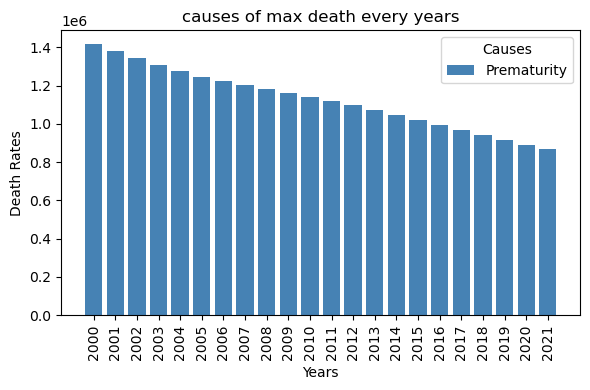

In [33]:
plt.figure(figsize= (6,4))
for cause in pivot_Cause_data.columns:
    plt.bar(pivot_Cause_data.index , pivot_Cause_data[cause],label=cause,color = 'steelblue')
    
plt.xlabel('Years')
plt.ylabel('Death Rates')
plt.title('causes of max death every years')
plt.legend(title= 'Causes',loc = 'upper right')
plt.xticks(pivot_Cause_data.index,rotation=90)
plt.tight_layout()
plt.show()

## II. Income Group

### 1. Total death rates per income group overall 

In [34]:
Total_death_per_income = data.groupby('Income_group').agg({'Value_Numeric':'sum'}).sort_values(by ='Value_Numeric' )
Total_death_per_income

,Value_Numeric
Income_group,
High income,9.783730e+05
Upper middle income,9.423406e+06
Low income,1.437965e+07
Lower middle income,4.428090e+07


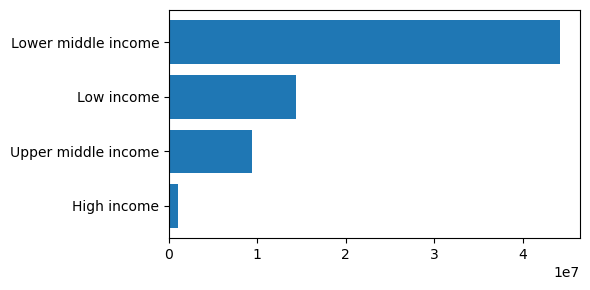

In [35]:
income = Total_death_per_income.index
death_rates = Total_death_per_income['Value_Numeric']
plt.figure(figsize=(6,3))
plt.barh(income,death_rates)
plt.tight_layout()
plt.show()

"Among the income groups, lower middle-income shows the highest death rates compared to others, while the high-income group shows the lowest death rates."

### 2.  Cause-Based Analysis Across Income Groups

In [36]:
income_cause_sum = data.groupby(['Income_group','Cause'])['Value_Numeric'].sum().reset_index()
income_cause_sum.head(5)

,Income_group,Cause,Value_Numeric
0,High income,Acute lower respiratory infections,12214.111647
1,High income,Birth asphyxia and birth trauma,100325.438168
2,High income,Congenital anomalies,269922.854846
3,High income,Diarrhoeal diseases,20.402655
4,High income,HIV/AIDS,58.271530


In [37]:
pivot_income_data = income_cause_sum.pivot_table(index="Income_group",columns='Cause',values='Value_Numeric')
pivot_income_data

Cause,Acute lower respiratory infections,Birth asphyxia and birth trauma,Congenital anomalies,Diarrhoeal diseases,HIV/AIDS,Injuries,Malaria,Measles,Meningitis/encephalitis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),Prematurity,Sepsis and other infectious conditions of the newborn,Tetanus,Tuberculosis
Income_group,,,,,,,,,,,,,,
High income,1.221411e+04,1.003254e+05,2.699229e+05,20.402655,58.271530,8159.796021,1.058029,0.0,610.654036,1.233118e+05,4.162909e+05,4.745264e+04,5.060869,0.0
Low income,1.453147e+06,3.502878e+06,7.858868e+05,320799.574393,15315.918561,66797.467177,0.000000,0.0,137307.834175,1.520221e+06,5.386901e+06,1.051453e+06,138940.400253,0.0
Lower middle income,4.292818e+06,1.112239e+07,3.278994e+06,766683.338165,25637.704847,149181.594202,0.000000,0.0,395749.394759,5.077212e+06,1.549753e+07,3.408479e+06,266233.134371,0.0
Upper middle income,6.303098e+05,2.018778e+06,1.533002e+06,36495.342380,2881.483935,256610.928709,37.924461,0.0,14825.721938,9.171196e+05,3.445951e+06,5.425537e+05,24840.286355,0.0


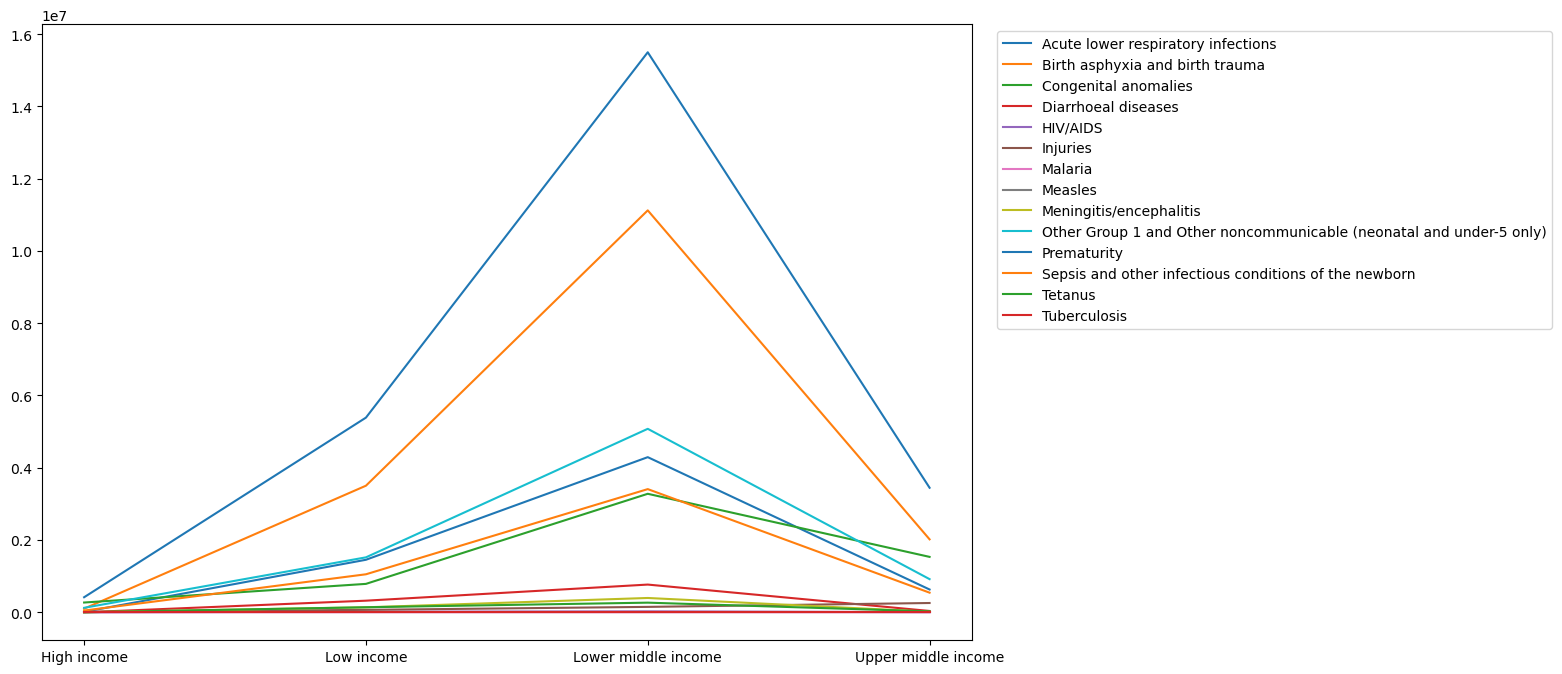

In [38]:
plt.figure(figsize = (12,8))
for cause in pivot_income_data.columns:
    plt.plot(pivot_income_data.index,pivot_income_data[cause],label=cause)

plt.legend(bbox_to_anchor=(1.02, 1),loc= 'upper left') 
plt.show()

"After analyzing, it's clear that the lower middle-income group experiences the highest death rates compared to other income brackets, hereThe top reasons for the highest death rates seem to be Prematurity, birth asphyxia and birth trauma. high-income group shows lower death rates."

### 3. Region-Based Analysis Across Income Groups

In [39]:
# Grouping by 'Region' and 'Income_group' and counting occurrences
Income_region_Dis = data.groupby(['Region', 'Income_group']).size().unstack()
Income_region_Dis

Income_group,High income,Low income,Lower middle income,Upper middle income
Region,,,,
Africa,308.0,6160.0,6160.0,1848.0
Americas,3388.0,NaN,1232.0,5852.0
Eastern Mediterranean,1848.0,1540.0,2464.0,616.0
Europe,10472.0,NaN,1232.0,4620.0
South-East Asia,NaN,308.0,2156.0,924.0
Western Pacific,2156.0,NaN,3388.0,2156.0


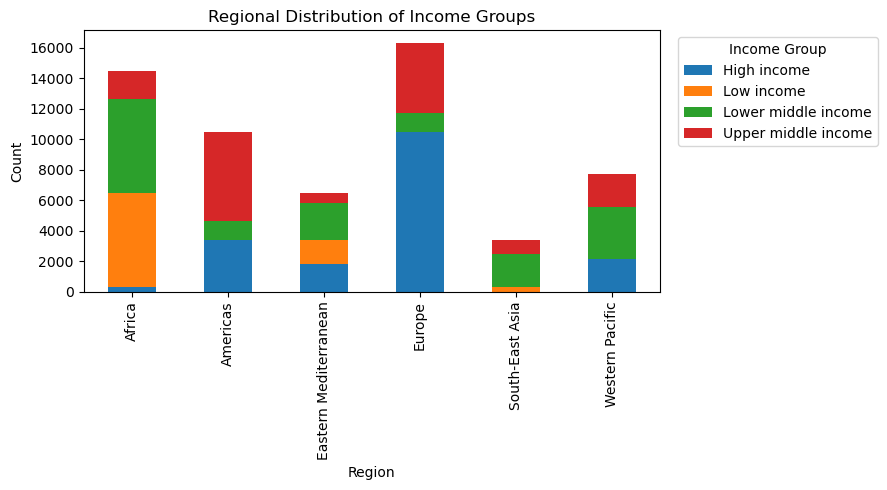

In [40]:
Income_region_Dis.plot(kind='bar',stacked=True, figsize=(9,5))

plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Regional Distribution of Income Groups")
plt.legend(bbox_to_anchor=(1.02, 1),loc= 'upper left',title= 'Income Group')
plt.tight_layout()
plt.show()

"From the plot, I observed few things: Firstly, Europe consistently has the most high-income groups across all income levels compared to other regions. 

Secondly, regions like Americas, Europe, and the Western Pacific don't seem to have any low-income groups.These regions may have strong economies, influencing fewer people to fall into the low-income category."

Lastly, Africa having a large number of lower-middle-income groups suggests there might be a higher chance of more deaths compared to other regions."

## III. Cause

### 1.  Maximum mortality  by each cause

In [41]:
maximum_death_each_cause = data.groupby(['Cause']).agg({'Value_Numeric':'max'})
maximum_death_each_cause.head(5)

,Value_Numeric
Cause,
Acute lower respiratory infections,4.340643e+05
Birth asphyxia and birth trauma,1.002297e+06
Congenital anomalies,2.824544e+05
Diarrhoeal diseases,7.814299e+04
HIV/AIDS,3.526530e+03


Text(0.5, 1.0, ' Maximum mortality by each cause')

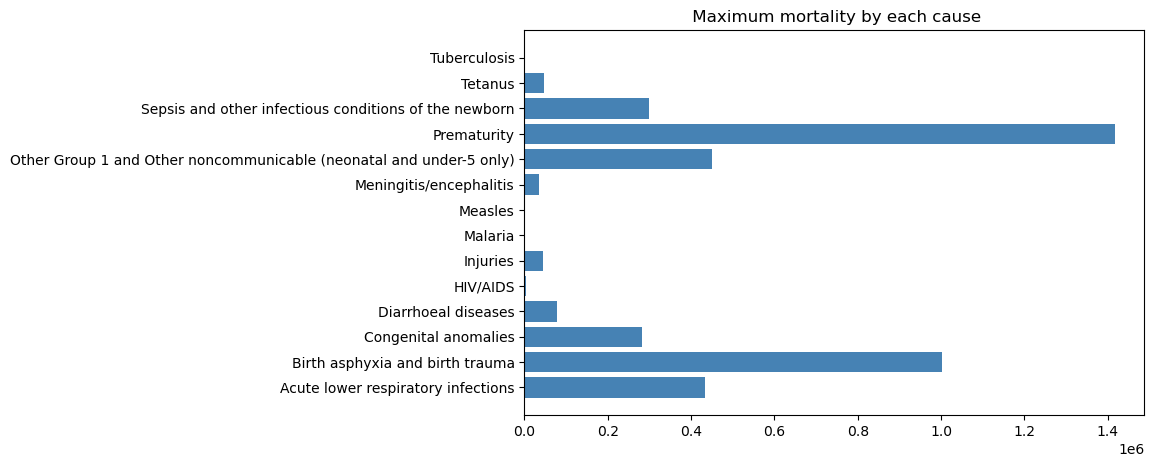

In [42]:
colors = ['steelblue']
plt.figure(figsize=(8,5))
plt.barh(maximum_death_each_cause.index, maximum_death_each_cause['Value_Numeric'], color= colors )
plt.title(' Maximum mortality by each cause')

"The primary Reasons for the highest mortality rates are prematurity, birth asphyxia and birth trauma."

### 2. Total death rate due to each cause throughout the years

In [43]:
Total_deaths_byEachCause_EveryYear = data.groupby(['Cause','Year','Region'],as_index = False)['Value_Numeric'].sum()
Total_deaths_byEachCause_EveryYear.rename(columns = {'Value_Numeric': 'Death_rates'},inplace =True)
Total_deaths_byEachCause_EveryYear.head(5)

,Cause,Year,Region,Death_rates
0,Acute lower respiratory infections,2000,Africa,277014.972878
1,Acute lower respiratory infections,2000,Americas,19175.107281
2,Acute lower respiratory infections,2000,Eastern Mediterranean,105232.207534
3,Acute lower respiratory infections,2000,Europe,8097.283589
4,Acute lower respiratory infections,2000,Global,434064.337940


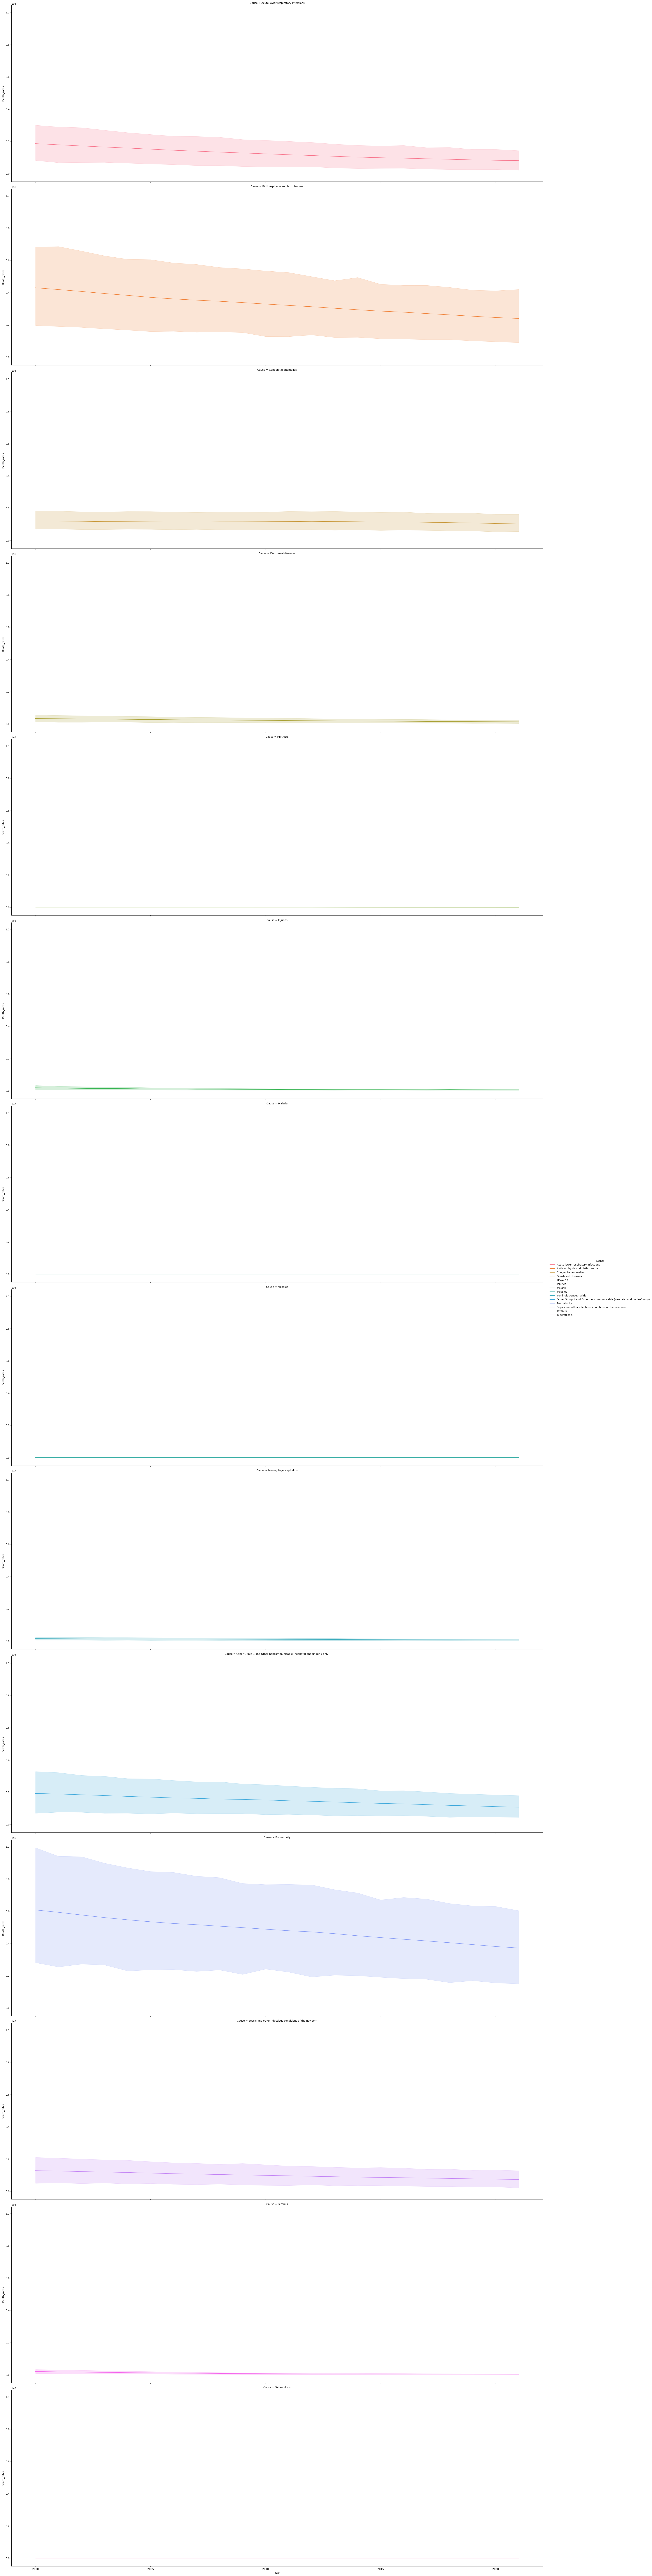

In [44]:
sns.relplot(
    data=Total_deaths_byEachCause_EveryYear, kind="line",
    x="Year", y="Death_rates", hue="Cause",row='Cause',height=10, aspect=3
)

## IV. Region

We're removing 'Global' because it's not a specific region; it might represent the total of all regions. For now, let's exclude it.

In [45]:
df = data[data['Region'] != 'Global']
df.head(1)

,Year,Country,Region,Income_group,Cause,Value_Numeric
0,2000,NaN,Africa,NaN,HIV/AIDS,3077.715375


### 1. Correlating entry counts to death rates across regions.

Analyzing the relationship between the number of recorded entries and corresponding death rates across various regions to understand how entry count impacts average death rates in different geographic areas."

In [46]:
region_count_mean = df.groupby('Region').agg({'Value_Numeric':['count','mean']}, as_index = False)
region_count_mean

Value_Numeric              
                              count          mean
Region                                           
Africa                        14784   3187.217668
Americas                      11088    569.957792
Eastern Mediterranean          6776   3530.935950
Europe                        16632    184.739298
South-East Asia                3696  12803.767857
Western Pacific                8624   1236.495826

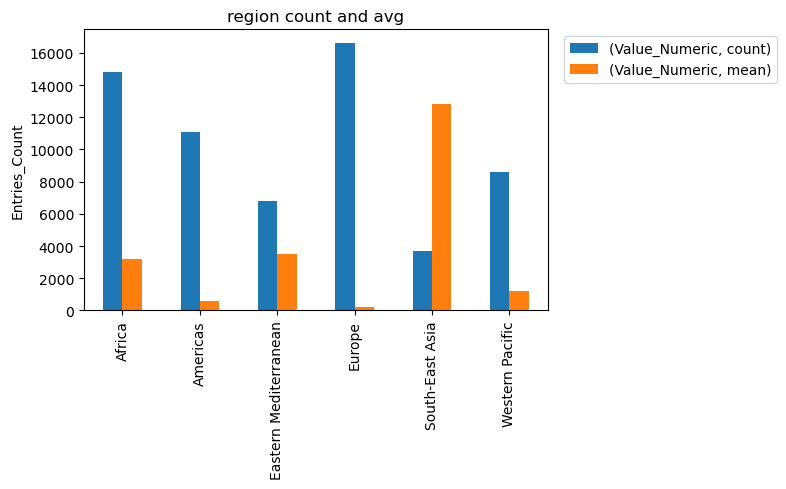

In [47]:
region_count_mean.plot(kind='bar',stacked=False, figsize=(8, 5))

plt.ylabel('Entries_Count')
plt.xlabel('')
plt.title("region count and avg")
plt.legend(bbox_to_anchor=(1.02, 1),loc= 'upper left')
plt.tight_layout()
plt.show()

* Europe: It has the most data (16,632 entries) but the lowest average death rates compared to other regions.
* Americas: Also has a high number of entries, but shows lower average death rates.
* South-East Asia: Even with less data (3,696 entries), it shows the highest average death rates among all regions.

### 2. What trends do we observe in the death rates among different regions over the years?

In [48]:
yearly_deaths_by_region = df.groupby(['Year', 'Region'])['Value_Numeric'].sum().reset_index()

# Calculating the total deaths per year
total_deaths_per_year = df.groupby('Year')['Value_Numeric'].sum()

# Calculating the percentage of death rate by each region for each year
yearly_deaths_by_region['Percentage'] = yearly_deaths_by_region.apply(
    lambda row: (row['Value_Numeric'] / total_deaths_per_year[row['Year']]) * 100,
    axis=1
)

yearly_deaths_by_region.sort_values(by=['Year', 'Value_Numeric'], ascending=[True, False]).head(3)


,Year,Region,Value_Numeric,Percentage
4,2000,South-East Asia,3.289076e+06,40.191576
0,2000,Africa,2.172030e+06,26.541591
2,2000,Eastern Mediterranean,1.171566e+06,14.316204


In [49]:
pivot_table = yearly_deaths_by_region.pivot(index='Year', columns='Region', values='Percentage')
pivot_table.head(3)

Region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
Year,,,,,,
2000,26.541591,5.071085,14.316204,2.558344,40.191576,11.321201
2001,27.246802,4.952711,14.605210,2.512665,40.148872,10.533739
2002,27.994077,4.840370,14.951165,2.432543,39.705927,10.075917


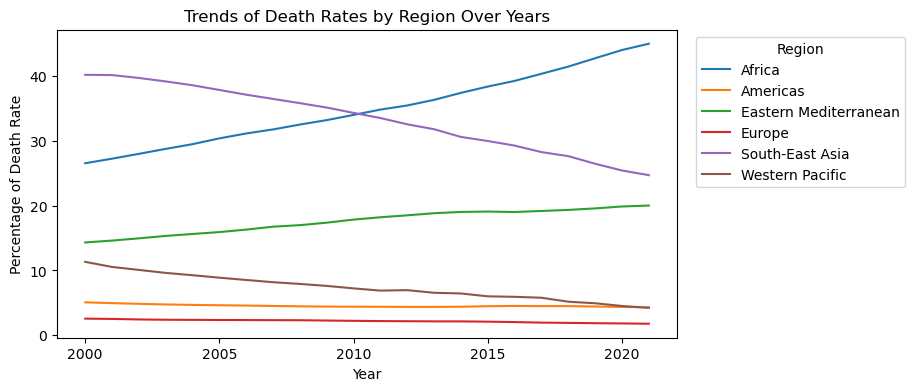

In [67]:
pivot_table.plot(kind='line', figsize=(8, 4))

plt.xlabel('Year')
plt.ylabel('Percentage of Death Rate')
plt.title('Trends of Death Rates by Region Over Years')
plt.legend(bbox_to_anchor=(1.02, 1),title='Region', loc='upper left')
plt.show()

* it's noticeable that South East Asia had the highest death rates in the initial ten years. However, after 2010, Africa's death rates increased compared to South East Asia. 
* On the other hand, America and Europe appear consistent over the past 20 years, suggesting these regions have relatively lower and more manageable under-5 death rates compared to others.

### 3. In each year, which region registers the highest death rates among children under five?

In [68]:
# Grouping data by 'Year' to find the region with the maximum value in each year
max_values_by_region_in_each_year =df.loc[df.groupby(['Year'])['Value_Numeric'].idxmax()]

max_values_by_region_in_each_year_pivot = max_values_by_region_in_each_year.pivot(index='Year', columns='Region', values='Value_Numeric')


max_values_by_region_in_each_year_pivot.head(5)

Region,Africa,South-East Asia
Year,,
2000,NaN,594135.81272
2001,NaN,577593.95641
2002,NaN,554888.79609
2003,NaN,530896.12852
2004,NaN,510091.36859


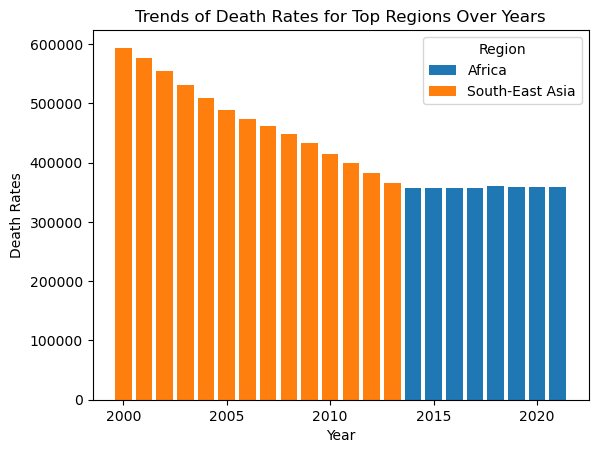

In [52]:
for col in max_values_by_region_in_each_year_pivot.columns:
    plt.bar(max_values_by_region_in_each_year_pivot.index, max_values_by_region_in_each_year_pivot[col], label=col)

plt.xlabel('Year')
plt.ylabel('Death Rates')
plt.title('Trends of Death Rates for Top Regions Over Years')
plt.legend(title='Region', loc='upper right')
plt.show()

Until 2013, South East Asia had the most deaths. But after that, it looks like Africa's deaths went up.

### 4. Find out the which Region has which income groups

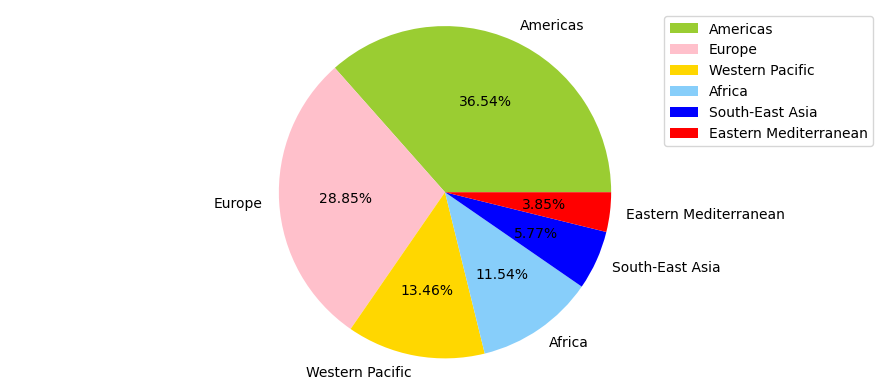

In [98]:
regioncounts_Upperincome = copy_df[copy_df['Income_group'] == 'Upper middle income']['Region'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(9, 4))
plt.pie(
    regioncounts_Upperincome,
    labels=regioncounts_Upperincome.index,   
    colors=colors,
    autopct='%1.2f%%'
)
plt.legend(loc='best')  
plt.axis('equal')
plt.tight_layout()
plt.show()

In [96]:
regioncounts_Upperincome

Americas                 5852
Europe                   4620
Western Pacific          2156
Africa                   1848
South-East Asia           924
Eastern Mediterranean     616
Name: Region, dtype: int64

"America and Europe have the most upper-middle-income compared to other regions."

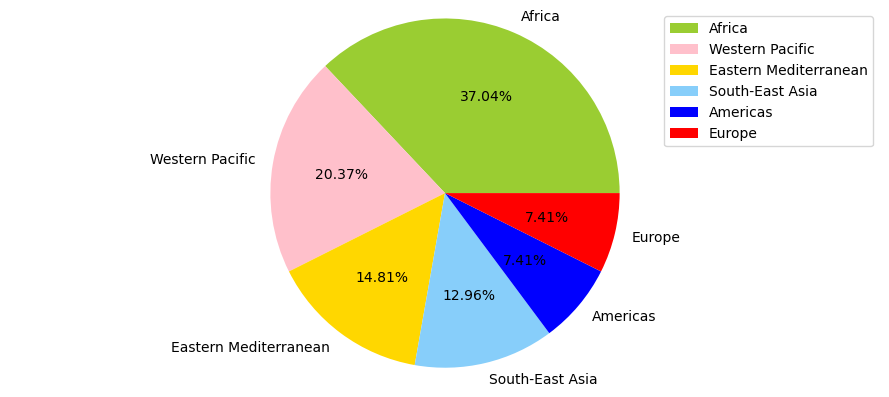

In [97]:
regioncounts_lowerincome = copy_df[copy_df['Income_group'] == 'Lower middle income']['Region'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(9, 4))
plt.pie(
    regioncounts_lowerincome,
    labels=regioncounts_lowerincome.index,  
    colors=colors,
    autopct='%1.2f%%'
)
plt.legend(loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()


"In Africa, where the lower middle income group is highest, the under-5 death rates are also the highest among other regions."

# Inferences and conclusion

## Problem Statement

## Year
   #### 1.  Is there a correlation between the year and mortality rates
   
   * A correlation of -0.0165 indicates a very weak, nearly negligible negative linear relationship between Year and Number of under 5 deaths 

   #### 2.  how has the no. of under 5 death rates changed over the year

* Between 2000 to 2021, the under-five mortality rates experienced a notable decrease, dropping from 12.28 million to 7.03 million.

* This may be due to various medical advances, Vaccination coverage and new diagnostic studies

  
  
#### 3. Death Rates for Top Five Countries Over Years
 
 * China and india Started with high death rates in 2000 but decreased Continuously over the years, indicating a decline in mortality rates.

* Ethiopia: Appears relatively stable over the years, without noticeable increases or decreases in mortality rates.

* Nigeria: Shows a slight increase in mortality rates after 2010, indicating a potential rise in death rates during that period.

* Pakistan's deaths went up until about 2005, then went down a bit after 2015.
 
 #### 4. Which cause was the reason for highest death rates every year

* The leading cause contributing to the highest mortality rates: Prematurity.

## Income Group
   
   #### 1. Total death rates per income group overall

* Among the income groups, lower middle-income shows the highest death rates compared to others, while the high-income group shows the lowest death rates.

#### 2.Cause-Based Analysis Across Income Groups

* After analyzing, it's clear that the lower middle-income group experiences the highest death rates compared to other income brackets. high-income group shows lower death rates. 

* The top reasons for the highest death rates seem to be Prematurity, birth asphyxia and birth trauma in lower middle income group.

#### 3. Region-Based Analysis Across Income Groups

* Europe consistently has the most high-income groups across all income levels compared to other regions.

* Africa having a large number of lower-middle-income groups suggests there might be a higher chance of more deaths compared to other regions.

* regions like Americas, Europe, and the Western Pacific don't seem to have any low-income groups.These regions may have strong economies, influencing fewer people to fall into the low-income category.

## Cause

#### 1. Maximum mortality rates by each cause

*  Prematurity has the highest max deaths, followed by birth asphyxia and birth trauma.

* Next most common causes for max death rates are noncommunicable (neonatal and under-5 only) diseases and Acute lower respiratory infections	


#### 2.Total death rate due to each cause throughout the years

* Prematurity seems to be the cause of highest death rates globally



## Region

#### 1. Correlating entry counts to death rates across regions.

* Europe: It has the most data (16,632 entries) but the lowest average death rates compared to other regions.
* Americas: Also has a high number of entries, but shows lower average death rates.
* South-East Asia: Even with less data (3,696 entries), it shows the highest average death rates among all regions.

#### 2. What trends do we observe in the death rates among different regions over the years?

* South East Asia had the highest death rates in the initial ten years. However, after 2010, Africa's death rates increased compared to South East Asia.
* On the other hand, America and Europe appear consistent over the past 20 years, suggesting these regions have relatively lower and more manageable under-5 death rates compared to others.

#### 3. In each year, which region registers the highest death rates among children under five?

* Until 2010, South East Asia had the most deaths. But after that, it looks like Africa's deaths went up. 

#### 4. Find out that which Region has which income groups¶

* America and Europe have the most upper-middle-income compared to other regions.
* In Africa, where the lower middle income group is highest, the under-5 death rates are also the highest among other regions.